## 2. Scikit-learn

### 0. EDA

a)

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [252]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [253]:
# dropped the rows with no values for horsepower
df = df[df["horsepower"].notnull()]
df.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model_year      392
origin          392
name            392
dtype: int64

b)

In [254]:
df.drop("model_year", axis=1).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


c)

Text(0.5, 1.0, 'displacement vs horsepower')

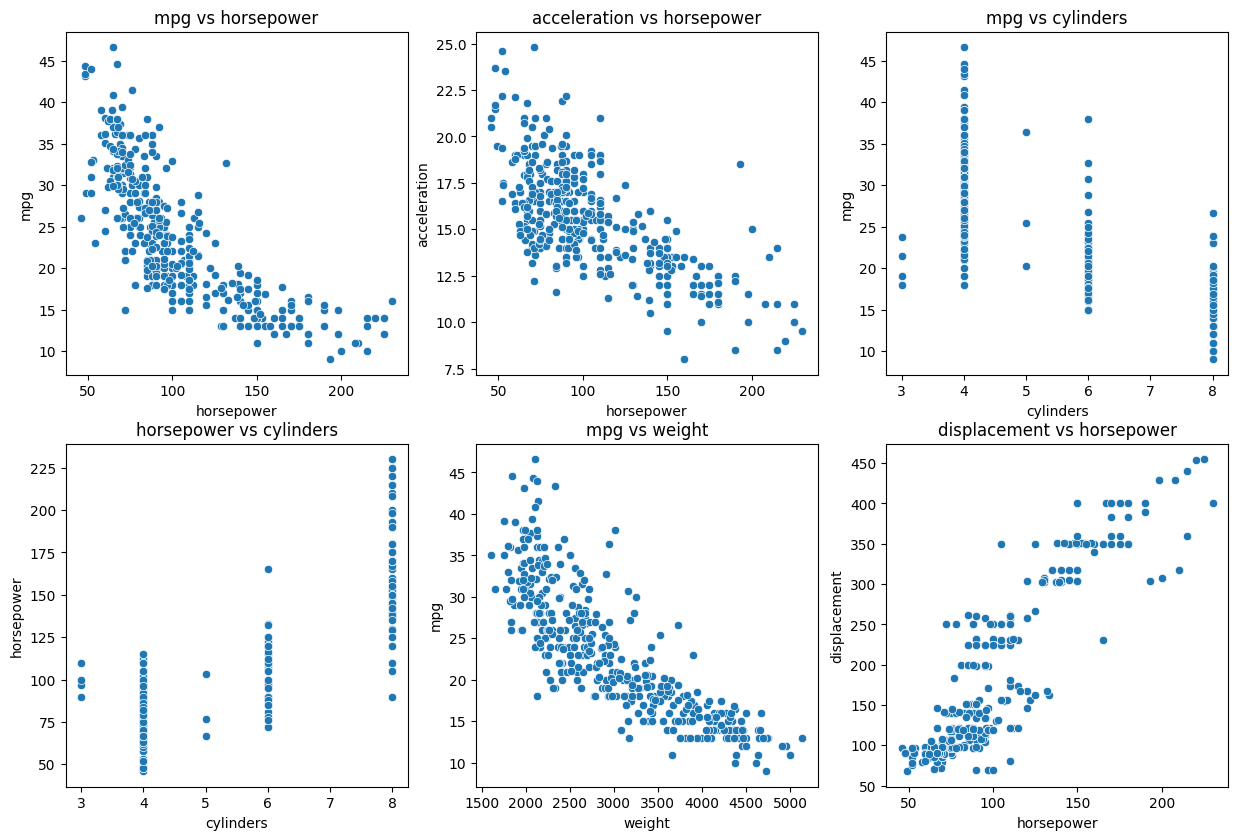

In [255]:
fig, ax = plt.subplots(2, 3, figsize=[15,10], dpi=100)
sns.scatterplot(x=df["horsepower"], y=df["mpg"], ax=ax[0,0])
ax[0,0].set_title("mpg vs horsepower")
sns.scatterplot(x=df["horsepower"], y=df["acceleration"], ax=ax[0,1])
ax[0,1].set_title("acceleration vs horsepower")
sns.scatterplot(x=df["cylinders"], y=df["mpg"], ax=ax[0,2])
ax[0,2].set_title("mpg vs cylinders")
sns.scatterplot(x=df["cylinders"], y=df["horsepower"], ax=ax[1,0])
ax[1,0].set_title("horsepower vs cylinders")
sns.scatterplot(x=df["weight"], y=df["mpg"], ax=ax[1,1])
ax[1,1].set_title("mpg vs weight")
sns.scatterplot(x=df["horsepower"], y=df["displacement"], ax=ax[1,2])
ax[1,2].set_title("displacement vs horsepower")

d)

In [256]:
df = df.drop(["origin", "name"], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### 1. Train|test split

In [257]:
X, y = df.drop("mpg", axis=1), df["mpg"]
X.shape, y.shape

((392, 6), (392,))

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

### 2. Function for evaluation

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [260]:
def train_regression_model(X_train, y_train, X_test, y_test, model):
    # fit model to training data
    model = model
    model.fit(X_train, y_train)

    # predict on test data
    y_pred = model.predict(X_test)

    # evaluation metrics
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    return (MAE, MSE, RMSE)

In [261]:
def round_metrics(metrics):
    return (round(metrics[0], 2), round(metrics[1], 2), round(metrics[2], 2))

test_LinearRegression = train_regression_model(X_train, y_train, X_test, y_test, LinearRegression())
rounded_test_LinearRegression = round_metrics(test_LinearRegression)

print(f"MAE: {rounded_test_LinearRegression[0]}")
print(f"MSE: {rounded_test_LinearRegression[1]}")
print(f"RMSE: {rounded_test_LinearRegression[2]}")

MAE: 2.5
MSE: 10.5
RMSE: 3.24


### 3. Compare models

In [262]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [263]:
def scale_dataset(X_train, X_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    return (scaled_X_train, scaled_X_test)

In [289]:
def poly_fit(X_train, X_test, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly.fit(X_train)
    poly_X_train = poly.transform(X_train)
    poly_X_test = poly.transform(X_test)

    return (poly_X_train, poly_X_test)

In [290]:
compare_models = pd.DataFrame(index = ["MAE", "MSE", "RMSE"])
 
SVD = train_regression_model(X_train, y_train, X_test, y_test, LinearRegression())
compare_models["SVD"] = round_metrics(SVD)

# scale data set
scaled_data = scale_dataset(X_train, X_test)
scaled_X_train, scaled_X_test = scaled_data[0], scaled_data[1]

SVD_scaled = train_regression_model(scaled_X_train, y_train, scaled_X_test, y_test, LinearRegression())
compare_models["SVD w/ scaled data"] = round_metrics(SVD_scaled)

SGD = train_regression_model(scaled_X_train, y_train, scaled_X_test, y_test, SGDRegressor())
compare_models["SGD"] = round_metrics(SGD)

# polynomial transformation with degree 1 to 3
for degree in range(1,4):
    poly_fit_data = poly_fit(X_train, X_test, degree)
    poly_X_train, poly_X_test = poly_fit_data[0], poly_fit_data[1]

    poly = train_regression_model(poly_X_train, y_train, poly_X_test, y_test, LinearRegression())
    compare_models[f"Poly degree {degree}"] = round_metrics(poly)

In [291]:
compare_models

,SVD,SVD w/ scaled data,SGD,Poly degree 1,Poly degree 2,Poly degree 3
MAE,2.50,2.50,2.57,2.50,1.98,2.12
MSE,10.50,10.50,11.19,10.50,7.42,9.27
RMSE,3.24,3.24,3.34,3.24,2.72,3.05
